Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


C:\Users\ss724\AppData\Local\Temp\ipykernel_4660\3077828405.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\ss724\AppData\Local\Temp\ipykernel_4660\3077828405.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

✅ Accuracy: 0.7479674796747967

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.42      0.54        43
           1       0.75      0.93      0.83        80

    accuracy                           0.75       123
   macro avg       0.75      0.67      0.68       123
weighted avg       0.75      0.75      0.73       123



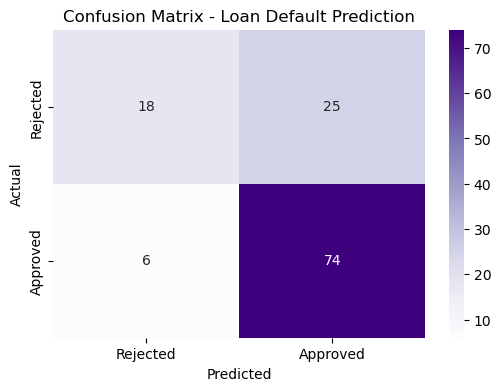

In [1]:
# ------------------ 1. Import Libraries ------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ------------------ 2. Load Dataset ------------------
df = pd.read_csv(r'C:\Users\ss724\Downloads\train.csv')  # make sure train.csv is in your directory
df.head()

# ------------------ 3. Explore and Clean ------------------
print(df.isnull().sum())  # check for nulls

# Fill missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Drop Loan_ID as it’s not predictive
df.drop('Loan_ID', axis=1, inplace=True)

# ------------------ 4. Encode Categorical Variables ------------------
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Convert Dependents to numeric
df['Dependents'].replace('3+', 3, inplace=True)
df['Dependents'] = df['Dependents'].astype(int)

# ------------------ 5. Train-Test Split ------------------
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']  # 1 = Yes (loan approved), 0 = No

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------ 6. Train Classifier ------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# ------------------ 7. Predict and Evaluate ------------------
y_pred = model.predict(X_test_scaled)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# ------------------ 8. Confusion Matrix ------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Loan Default Prediction')
plt.show()


In [2]:
# ------------------ 9. Predict on X_test ------------------
# Predict probabilities and classes
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# Convert predictions to labels for display
predicted_labels = ['Approved' if label == 1 else 'Rejected' for label in y_pred]
actual_labels = ['Approved' if label == 1 else 'Rejected' for label in y_test.values]

# Create a DataFrame for comparison
prediction_df = pd.DataFrame({
    'Applicant_ID': X_test.index,
    'Actual': actual_labels,
    'Predicted': predicted_labels,
    'Probability (Approved)': y_pred_prob.round(3)
})

# Reset index and show top results
prediction_df.reset_index(drop=True, inplace=True)
prediction_df.head(10)


,Applicant_ID,Actual,Predicted,Probability (Approved)
0,350,Approved,Approved,0.76
1,377,Approved,Approved,0.87
2,163,Approved,Approved,0.75
3,609,Approved,Rejected,0.49
4,132,Approved,Approved,0.94
5,578,Approved,Approved,0.68
6,316,Approved,Approved,0.97
7,2,Approved,Approved,0.76
8,340,Rejected,Approved,0.75
9,77,Rejected,Approved,0.57
